<a href="https://colab.research.google.com/github/thuBv-123/Bui-Vu-Anh-Thu--31241025695--LT0001/blob/main/Bai%204.2%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install scikit-fuzzy

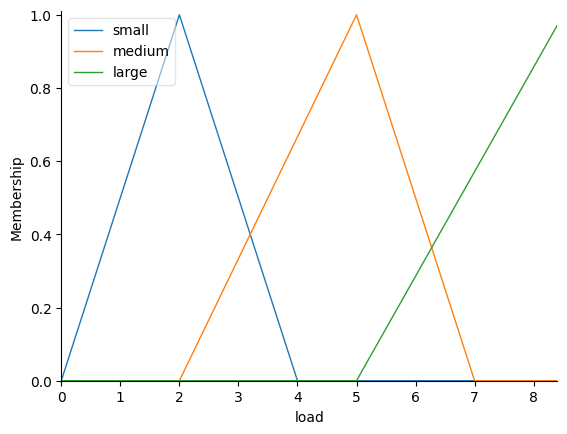

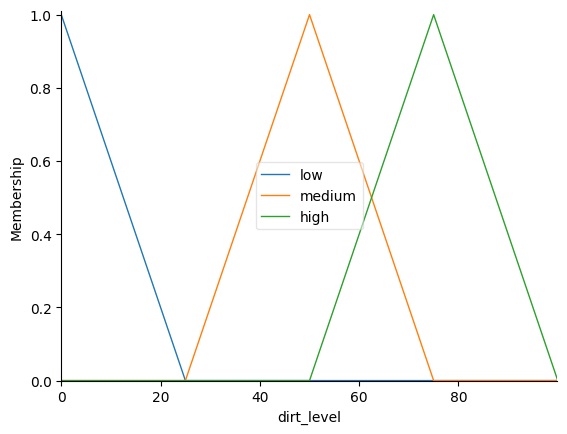

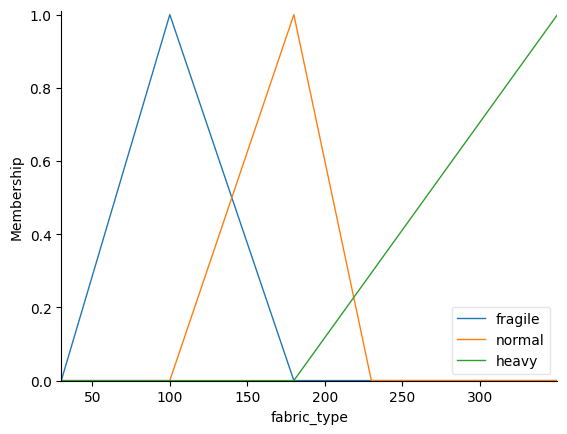

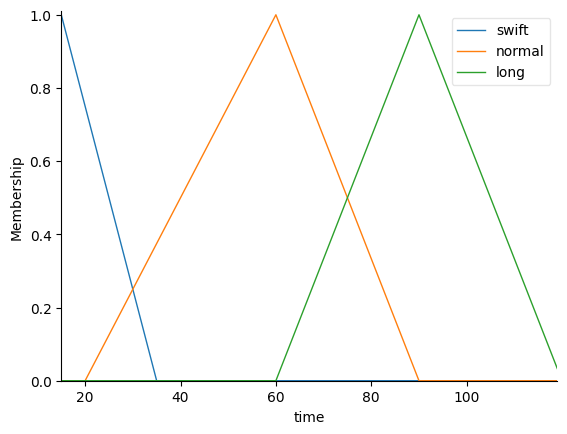

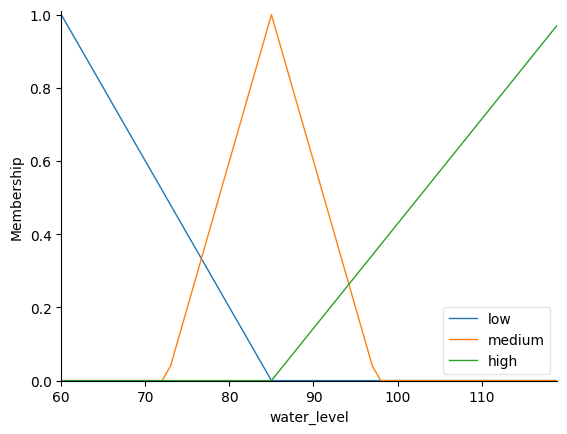

In [9]:
#exam 3

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

load=ctrl.Antecedent(np.arange(0,8.5,0.1),'load')
dirt_level=ctrl.Antecedent(np.arange(0,100,0.1),'dirt_level')
fabric_type=ctrl.Antecedent(np.arange(30,350,0.1),'fabric_type')
time=ctrl.Consequent(np.arange(15,120,1),'time')
water_level=ctrl.Consequent(np.arange(60,120,1),'water_level')


load['small']=fuzz.trimf(load.universe,[0,2,4])
load['medium']=fuzz.trimf(load.universe,[2,5,7])
load['large']=fuzz.trimf(load.universe,[5,8.5,8.5])
dirt_level['low']=fuzz.trimf(dirt_level.universe,[0,0,25])
dirt_level['medium']=fuzz.trimf(dirt_level.universe,[25,50,75])
dirt_level['high']=fuzz.trimf(dirt_level.universe,[50,75,100])
fabric_type['fragile']=fuzz.trimf(fabric_type.universe,[30,100,180])
fabric_type['normal']=fuzz.trimf(fabric_type.universe,[100,180,230])
fabric_type['heavy']=fuzz.trimf(fabric_type.universe,[180,350,350])
time['swift']=fuzz.trimf(time.universe,[15,15,35])
time['normal']=fuzz.trimf(time.universe,[20,60,90])
time['long']=fuzz.trimf(time.universe,[60,90,120])
water_level['low']=fuzz.trimf(water_level.universe,[60,60,85])
water_level['medium']=fuzz.trimf(water_level.universe,[72.5,85,97.5])
water_level['high']=fuzz.trimf(water_level.universe,[85,120,120])


load.view()
dirt_level.view()
fabric_type.view()
time.view()
water_level.view()



72.65329387262967
98.9068841412053


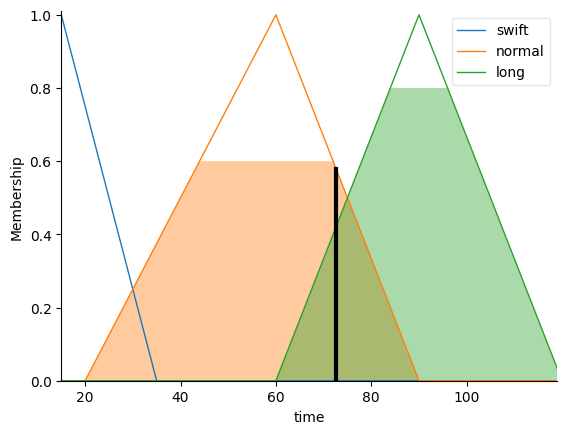

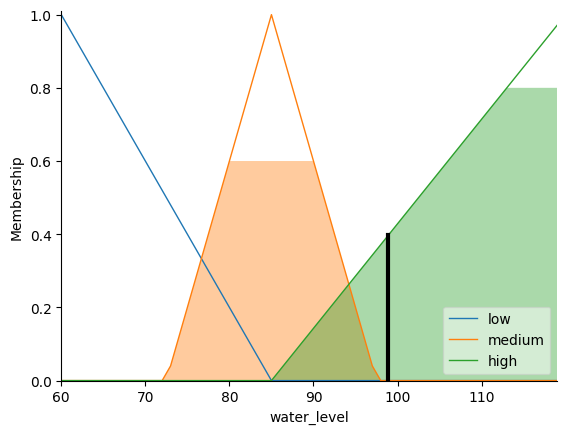

In [10]:
rule1=ctrl.Rule(load['small']&dirt_level['low'],(time['swift'],water_level['low']))
rule2=ctrl.Rule(load['small']&dirt_level['medium'],(time['normal'],water_level['medium']))
rule3=ctrl.Rule(load['small']&dirt_level['high'],(time['long'],water_level['medium']))
rule4=ctrl.Rule(load['medium']&dirt_level['low'],(time['normal'],water_level['medium']))
rule5=ctrl.Rule(load['medium']&dirt_level['medium'],(time['long'],water_level['medium']))
rule6=ctrl.Rule(load['medium']&dirt_level['high'],(time['long'],water_level['high']))
rule7=ctrl.Rule(load['large']&dirt_level['low'],(time['normal']),water_level['high'])
rule8=ctrl.Rule(load['large']&dirt_level['low'],(time['long'],water_level['high']))
rule9=ctrl.Rule(load['large']&dirt_level['medium'],(time['long'],water_level['high']))
rule10=ctrl.Rule(load['large']&dirt_level['medium'],(time['long'],water_level['high']))
rule11=ctrl.Rule(load['large']&dirt_level['high'],(time['long'],water_level['high']))
rule12=ctrl.Rule(fabric_type['fragile'],(time['swift'],water_level['low']))
rule13=ctrl.Rule(fabric_type['normal'],(time['normal'],water_level['medium']))
rule14=ctrl.Rule(fabric_type['heavy'],(time['long'],water_level['high']))
rule15=ctrl.Rule(load['large']&dirt_level['high']&fabric_type['heavy'],(time['long'],water_level['high']))
rule16=ctrl.Rule(load['small']&dirt_level['low']&fabric_type['fragile'],(time['swift'],water_level['low']))
rule17=ctrl.Rule(load['medium']&dirt_level['medium']&fabric_type['normal'],(time['normal'],water_level['medium']))




washing_time_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17])
washing_time=ctrl.ControlSystemSimulation(washing_time_ctrl)
washing_time.input['load']=5
washing_time.input['dirt_level']=70
washing_time.input['fabric_type']=200
washing_time.compute()
print(washing_time.output['time'])
print(washing_time.output['water_level'])
time.view(sim=washing_time)
water_level.view(sim=washing_time)